# <center>Classification of birds species based on bones using machine learning approach</center>

### &rarr; Data Description
#### Birds dataset have six classes and have various ecological groupings based on their habitats and dietary preferences. In this paper, we will be dealing with 6 ecological bird groups and each bird has been labelled by its ecological group.

- Swimming Birds (labelled as: SW)
- Wading Birds (labelled as: W)
- Terrestrial Birds (labelled as: T)
- Raptors (labelled as: R)
- Scansorial Birds (labelled as: P)
- Singing Birds (labelled as: SO)


#### The dataset we have contains 420 different bird species. For the representation of each bird there are 10 measurements which are listed below.

- Length and Diameter of Humerus
- Length and Diameter of Ulna
- Length and Diameter of Femur
- Length and Diameter of Tibiotarsus
- Length and Diameter of Tarsometatarsus

#### The type of all measurements are continuous float values (mm), and empty strings are used to represent any missing values. This dataset contains bones from the Natural History Museum of Los Angeles County. They are members of 153 genera, 21 orders, and 245 species.


### &rarr; Machine Learning ALgorithms

#### In this project, five different algorithms has been implemented for the classification of birds species. 

- Logistic Regression 
- SVM (Support Vector Machine) 
- KNN (K-Nearest Neighbour)
- Random Forest
- Gradient Boosted Classifier

#### The purpose of using five algorithms is to determine which algorithm yields the best results.

## Following are the required python libraries or packages for the classification

In [1]:
################ Exploratory Data Analysis and Pre-processing #################

import pandas as pd # For data manipulation and analysis
import numpy as np # To perform high level mathematical operations
import matplotlib.pyplot as plt # For animated and interactive visualisations
import seaborn as sns # For visualisations of data

# pandas-profiling primary goal is to provide a one-line Exploratory Data Analysis (EDA) experience
# in a consistent and fast solution.
from pandas_profiling import ProfileReport

from imblearn.over_sampling import RandomOverSampler #To generate new samples in the classes which are under-represented.

# The sklearn. preprocessing package provides several common utility functions and transformer classes 
# to change raw feature vectors into a representation that is more suitable for the downstream estimators. 
from sklearn.preprocessing import LabelEncoder #Encode target labels with value between 0 and n_classes-1

################ Model Selection and Model Training #################

# Model_selection is a method for setting a blueprint to analyze data and then 
# use it to measure new data
from sklearn.model_selection import train_test_split # Split arrays or matrices into random train and test subsets.

from sklearn.linear_model import LogisticRegression # Linear Model
from sklearn.ensemble import RandomForestClassifier # An ensemble tree-based learning algorithm
from sklearn.svm import SVC #Scalable Linear Support Vector Machine for classification

################ Metrics and Scoring #################
from sklearn.metrics import classification_report # Build a text report showing the main classification metrics
from sklearn.metrics import accuracy_score, f1_score # To check accuracy and F1 score of the models
from sklearn.metrics import confusion_matrix, precision_score, recall_score

## Read dataset (in csv format) from the directory

In [2]:
birdsDataset = pd.read_csv('./bird.csv') # Load dataset and assign it to the variable

## Exploratory Data Analysis (EDA)

#### Dataframe info() method gives the precise summary of dataset. 

In [3]:
 birdsDataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      420 non-null    int64  
 1   huml    419 non-null    float64
 2   humw    419 non-null    float64
 3   ulnal   417 non-null    float64
 4   ulnaw   418 non-null    float64
 5   feml    418 non-null    float64
 6   femw    419 non-null    float64
 7   tibl    418 non-null    float64
 8   tibw    419 non-null    float64
 9   tarl    419 non-null    float64
 10  tarw    419 non-null    float64
 11  type    420 non-null    object 
dtypes: float64(10), int64(1), object(1)
memory usage: 39.5+ KB


#### From above we can see, there is a list of columns of the dataset, with their number of occurrences and data types. All the variables are numeric other than the type which is an object

 --------------------------------------------------------------------------------------------------------

#### The DataFrame's data are described by the describe() method. The currrent dataFrame contains numerical data, so the description contains following information for each column
- count
- mean
- std (standard deviation)
- min
- max
- 25%, 50%, 75% percentile*


In [4]:
birdsDataset.describe().transpose()

count        mean         std    min       25%      50%      75%  \
id     420.0  209.500000  121.387808   0.00  104.7500  209.500  314.250   
huml   419.0   64.650501   53.834549   9.85   25.1700   44.180   90.310   
humw   419.0    4.370573    2.854617   1.14    2.1900    3.500    5.810   
ulnal  417.0   69.115372   58.784775  14.09   28.0500   43.710   97.520   
ulnaw  418.0    3.597249    2.186747   1.00    1.8700    2.945    4.770   
feml   418.0   36.872416   19.979082  11.83   21.2975   31.130   47.120   
femw   419.0    3.220883    2.023581   0.93    1.7150    2.520    4.135   
tibl   418.0   64.662823   37.838145   5.50   36.4175   52.120   82.870   
tibw   419.0    3.182339    2.080827   0.87    1.5650    2.490    4.255   
tarl   419.0   39.229976   23.184313   7.77   23.0350   31.740   50.250   
tarw   419.0    2.930024    2.185673   0.66    1.4250    2.230    3.500   

          max  
id     419.00  
huml   420.00  
humw    17.84  
ulnal  422.00  
ulnaw   12.00  
feml   117.07  
femw    11.64  
tibl   240.00  
tibw    11.03  
tarl   175.00  
tarw    14.09

---------------------------------------------------------------------------------------------------------

 #### Dataframe head method is used to check the first five records of the dataset

In [5]:
birdsDataset.head()

id   huml  humw  ulnal  ulnaw   feml  femw   tibl  tibw   tarl  tarw type
0   0  80.78  6.68  72.01   4.88  41.81  3.70   5.50  4.03  38.70  3.84   SW
1   1  88.91  6.63  80.53   5.59  47.04  4.30  80.22  4.51  41.50  4.01   SW
2   2  79.97  6.37  69.26   5.28  43.07  3.90  75.35  4.04  38.31  3.34   SW
3   3  77.65  5.70  65.76   4.77  40.04  3.52  69.17  3.40  35.78  3.41   SW
4   4  62.80  4.84  52.09   3.73  33.95  2.72  56.27  2.96  31.88  3.13   SW

 --------------------------------------------------------------------------------------------------------

### Check Missing Values in the Dataset 

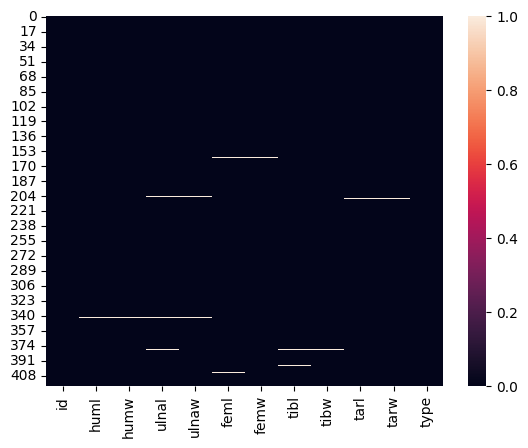

In [6]:
# heatmap() method of seaborn has been used to visualise missing values
sns.heatmap(birdsDataset.isna()); # isna() method to check NaN values in the dataset
plt.show()

#### Vertical axis shows the specific row where there is a missing value. Horizontal axis shows columns having missing values. From above we can see that there are some rows having more than one missing value and some do not have any missing value.

---------------------------------------------------------------------------------------------------------

### Class Distribution

In [7]:
birdsDataset['type'].value_counts() # Count the values of each class in column 'type'

SO    128
SW    116
W      65
R      50
P      38
T      23
Name: type, dtype: int64

#### Above list shows the class imbalance as each class has different number of records

---------------------------------------------------------------------------------------------------------

### Check outliers in the dataset

 #### A data point that is differnet out from the others is called an outlier.

In [8]:
# Below function 'outlier_boxplot' has been defined to plot all the columns/features in the 
# boxplot to check the outliers in the dataset

def outlier_boxplot(columns):
    print(columns) # Print to check number of features coming from declaration of function
    plt.figure(figsize=(12,5));
    plt.subplot(1,2,1); # create a grid of subplots
    sns.boxplot(x='type', y=columns[0], data=birdsDataset);
    plt.title(columns[0]); # Title of the plot 1 (Left side)
    plt.subplot(1,2,2);
    sns.boxplot(x='type', y=columns[1], data=birdsDataset);
    plt.title(columns[1]); # Title of the plot 2 (Right side)


Index(['huml', 'humw'], dtype='object')
Index(['ulnal', 'ulnaw'], dtype='object')
Index(['feml', 'femw'], dtype='object')
Index(['tibl', 'tibw'], dtype='object')
Index(['tarl', 'tarw'], dtype='object')


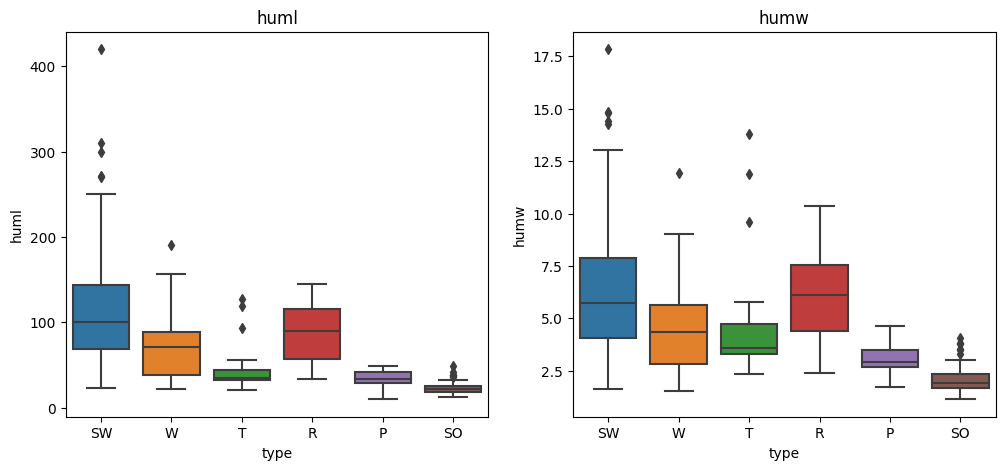

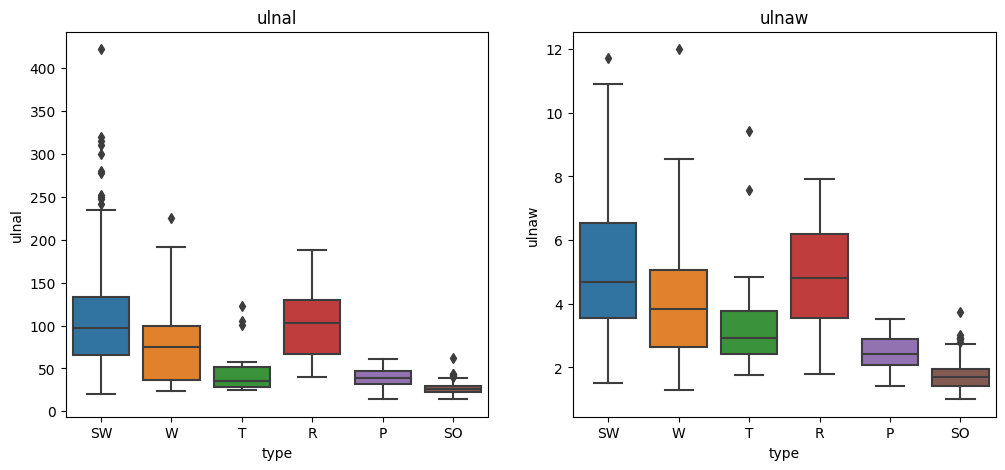

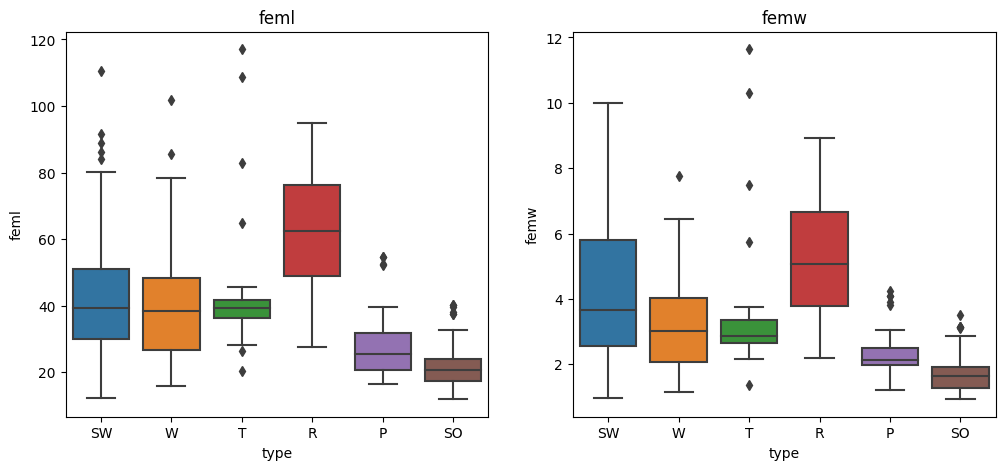

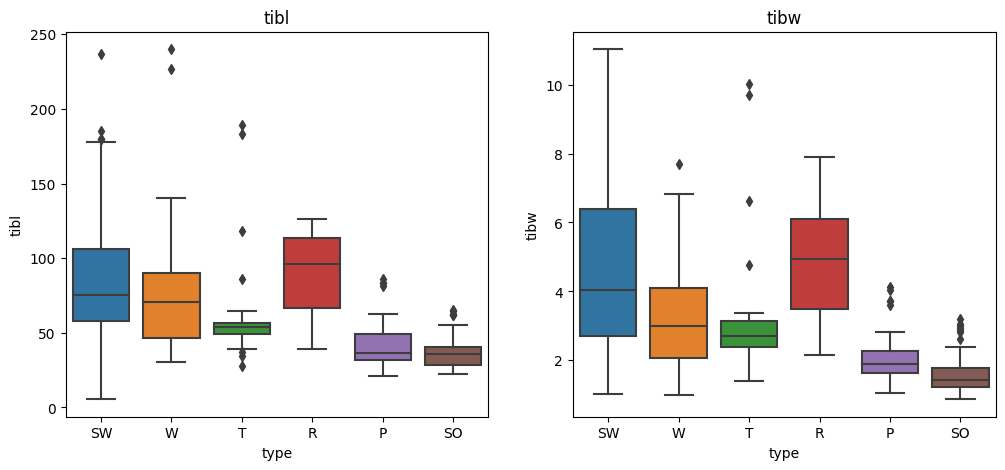

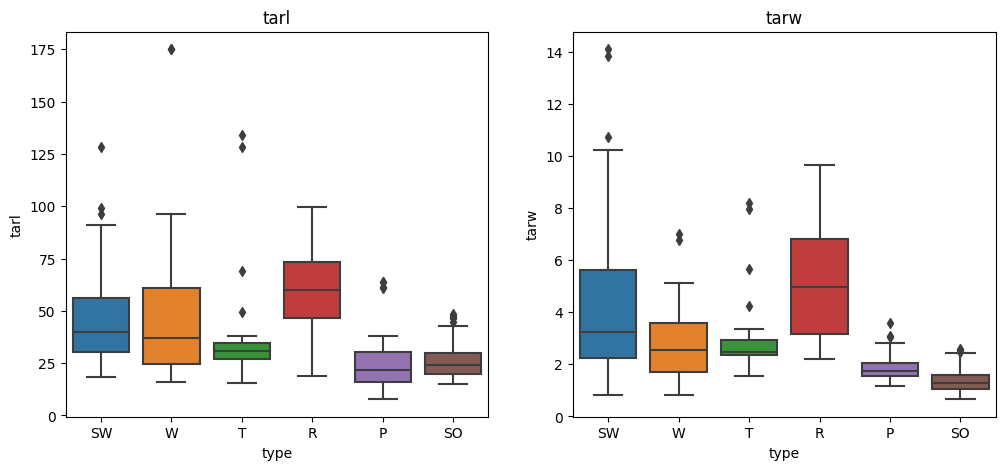

In [9]:
outlier_boxplot(birdsDataset.columns[1:3]) # function declaration
outlier_boxplot(birdsDataset.columns[3:5])
outlier_boxplot(birdsDataset.columns[5:7])
outlier_boxplot(birdsDataset.columns[7:9])
outlier_boxplot(birdsDataset.columns[9:11])

plt.show()

#### When analysing a box plot, data points outside the box plot's whiskers is referred to as an outlier. From the above subplots, "*" these data points are outliers.

---------------------------------------------------------------------------------------------------------

# Correlation

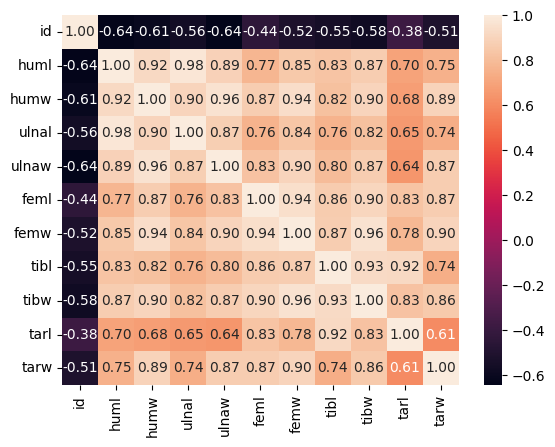

In [10]:
sns.heatmap(birdsDataset.iloc[:,:-1].corr(), annot=True, fmt='.2f');
plt.show()

#### Above heatmap shows the correlation between all the features. We can see that "id" column has a negative association with other variables and rest of the correlation ranges from 0.61 - 0.98. 

#### In data pre-processing, we will remove "id" column and those features having high correlaion. If correlation coefficient > 0.93 between two features we will remove one of it. Otherwise it will be like we are classifying having same features.

| Feature 1 | Feature 2 | Correlation Coefficient > 0.93 |
| --- | --- | --- |
| ulnal | huml | 0.98 |
| ulnaw | humw | 0.96 |
| femw | humw | 0.94 |
| femw | feml | 0.94 |
| tibw | femw | 0.96 |

In [11]:
birdsDataset= birdsDataset.drop(columns=['id','ulnal', 'ulnaw','femw', 'tibw']).dropna(how='any')

**Data Cleaning**

birdsDataset.drop(['id'], axis = 1, inplace = True) 

In [12]:
birdsDataset.head()

huml  humw   feml   tibl   tarl  tarw type
0  80.78  6.68  41.81   5.50  38.70  3.84   SW
1  88.91  6.63  47.04  80.22  41.50  4.01   SW
2  79.97  6.37  43.07  75.35  38.31  3.34   SW
3  77.65  5.70  40.04  69.17  35.78  3.41   SW
4  62.80  4.84  33.95  56.27  31.88  3.13   SW

*Missing Values*

In [13]:
filteredDataSet = birdsDataset[birdsDataset.type == "R"]
filteredDataSet.describe()

huml       humw       feml        tibl       tarl       tarw
count   49.000000  49.000000  49.000000   49.000000  49.000000  49.000000
mean    86.706939   6.030816  61.611429   89.518367  59.166327   5.073878
std     32.002726   2.178384  18.023726   26.640460  19.094756   2.021799
min     33.120000   2.400000  27.460000   38.990000  19.100000   2.220000
25%     57.480000   4.370000  47.830000   66.580000  46.810000   3.150000
50%     89.630000   6.090000  60.840000   96.120000  60.190000   4.950000
75%    116.410000   7.490000  75.540000  113.390000  73.290000   6.800000
max    145.000000  10.370000  94.790000  126.540000  99.720000   9.640000

In [14]:
def imputation(cols):
   
    type = cols[1]
    
    if pd.isnull(cols[0]):
        if type == "SW":
            return 110.25
        elif type == "SO":
            return 22.36
        elif type == "W":
            return 73.13
        elif type == "T":
            return 45.69
        elif type == "P":
            return 34.42
        else:
            return 86.93
    else:
        return cols[0]

In [15]:
columns = ['huml', 'humw','feml','tibl','tarl','tarw','type']

In [16]:
for x in columns:
    birdsDataset[x] = birdsDataset[[x, 'type']].apply(imputation, axis =1)

In [17]:
birdsDataset.isnull().sum()

huml    0
humw    0
feml    0
tibl    0
tarl    0
tarw    0
type    0
dtype: int64

*Removing Outliers one by one of each feature*

In [18]:
birdsDataset.describe().transpose()

count       mean        std    min      25%     50%      75%     max
huml  414.0  64.872174  53.990623   9.85  25.3700  44.325  90.4000  420.00
humw  414.0   4.382101   2.858048   1.14   2.2025   3.510   5.8150   17.84
feml  414.0  36.871981  19.900789  11.83  21.3775  31.130  47.1200  117.07
tibl  414.0  64.642343  37.935814   5.50  36.3600  51.940  82.8700  240.00
tarl  414.0  39.360242  23.267153   7.77  23.0950  31.810  50.5075  175.00
tarw  414.0   2.947005   2.192507   0.66   1.4300   2.245   3.5275   14.09

In [19]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [20]:
filteredDataTarw = remove_outlier(birdsDataset, "tarw")
filteredDataTarw.describe().transpose()

count       mean        std    min      25%     50%      75%     max
huml  376.0  55.356888  40.355081   9.85  24.0200  37.785  81.6175  250.00
humw  376.0   3.795293   2.117917   1.14   2.1500   3.300   5.0450   11.45
feml  376.0  32.956543  15.370465  11.83  20.9075  28.655  40.5075   82.94
tibl  376.0  58.615053  31.349961   5.50  35.5425  49.755  75.2650  185.00
tarl  376.0  36.346835  18.727390   7.77  22.8975  30.765  44.5375   99.72
tarw  376.0   2.404495   1.339823   0.66   1.3600   2.030   3.0500    6.64

In [21]:
filteredDataTarl = remove_outlier(filteredDataTarw, "tarl")
filteredDataTarl.describe().transpose()

count       mean        std    min    25%    50%    75%     max
huml  361.0  52.140000  36.803110   9.85  23.88  35.97  75.94  188.00
humw  361.0   3.628975   1.949694   1.14   2.11   3.16   4.78   11.37
feml  361.0  31.544626  13.801963  11.83  20.80  28.41  39.61   82.94
tibl  361.0  55.505457  27.516689   5.50  35.44  48.94  70.57  166.00
tarl  361.0  34.267064  15.966982   7.77  22.35  30.11  40.43   76.76
tarw  361.0   2.287729   1.216872   0.66   1.33   1.99   2.90    6.64

filteredDataTibw = remove_outlier(filteredDataTarl, "tibw")
filteredDataTibw.describe().transpose()

In [22]:
filteredDataTibl = remove_outlier(filteredDataTarl, "tibl")
filteredDataTibl.describe().transpose()

count       mean        std    min      25%     50%      75%     max
huml  350.0  49.771886  34.715928   9.85  23.5575  34.715  70.8800  188.00
humw  350.0   3.551571   1.921599   1.14   2.0825   2.995   4.7000   11.37
feml  350.0  31.180686  13.803064  11.83  20.6625  27.950  38.8750   82.94
tibl  350.0  52.764600  22.968394   5.50  35.0675  48.105  69.0175  118.24
tarl  350.0  33.127257  14.822650   7.77  22.0150  29.685  39.2150   76.76
tarw  350.0   2.247543   1.211265   0.66   1.3125   1.950   2.8300    6.64

filteredDataFemw = remove_outlier(filteredDataTibl, "femw")
filteredDataFemw.describe().transpose()

In [23]:
filteredDataFeml = remove_outlier(filteredDataTibl, "feml")
filteredDataFeml.describe().transpose()

count       mean        std    min     25%    50%     75%     max
huml  343.0  48.901137  34.500852   9.85  23.295  34.17  69.020  188.00
humw  343.0   3.478630   1.860965   1.14   2.065   2.98   4.505   11.37
feml  343.0  30.342974  12.601343  11.83  20.605  27.66  38.475   65.97
tibl  343.0  51.902070  22.305778   5.50  34.755  47.49  67.410  117.14
tarl  343.0  32.455073  14.088108   7.77  21.930  29.01  38.055   73.95
tarw  343.0   2.189942   1.145430   0.66   1.285   1.93   2.800    6.64

filteredDataUlnaw = remove_outlier(filteredDataFemw, "ulnaw")
filteredDataUlnaw.describe().transpose()

filteredDataUlnal = remove_outlier(filteredDataUlnaw, "ulnal")
filteredDataUlnal.describe().transpose()

In [24]:
filteredDataHumw = remove_outlier(filteredDataFeml, "humw")
filteredDataHumw.describe().transpose()

count       mean        std    min    25%    50%    75%     max
huml  337.0  46.679792  30.366647   9.85  23.27  34.07  67.63  154.30
humw  337.0   3.351395   1.604989   1.14   2.06   2.89   4.37    8.15
feml  337.0  29.973947  12.395792  11.83  20.59  27.46  38.27   65.97
tibl  337.0  51.482908  22.138146   5.50  34.64  46.64  66.60  116.09
tarl  337.0  32.559496  14.035064   7.77  22.12  29.16  38.07   73.95
tarw  337.0   2.123501   1.031139   0.66   1.28   1.92   2.71    5.63

In [25]:
filteredDataWithoutOutliers = remove_outlier(filteredDataHumw, "huml")
filteredDataWithoutOutliers.describe().transpose()

count       mean        std    min      25%     50%      75%     max
huml  334.0  45.794341  29.012161   9.85  23.0975  33.800  67.2925  129.50
humw  334.0   3.315808   1.567124   1.14   2.0525   2.875   4.3375    8.15
feml  334.0  29.761257  12.230973  11.83  20.4700  26.680  38.1500   65.97
tibl  334.0  50.936527  21.465792   5.50  34.6100  46.390  64.8975  113.44
tarl  334.0  32.251078  13.707391   7.77  22.0975  29.040  37.9700   73.95
tarw  334.0   2.107156   1.021092   0.66   1.2725   1.905   2.6975    5.63

In [26]:
filteredDataWithoutOutliers = remove_outlier(filteredDataHumw, "huml")
filteredDataWithoutOutliers.describe().transpose()

count       mean        std    min      25%     50%      75%     max
huml  334.0  45.794341  29.012161   9.85  23.0975  33.800  67.2925  129.50
humw  334.0   3.315808   1.567124   1.14   2.0525   2.875   4.3375    8.15
feml  334.0  29.761257  12.230973  11.83  20.4700  26.680  38.1500   65.97
tibl  334.0  50.936527  21.465792   5.50  34.6100  46.390  64.8975  113.44
tarl  334.0  32.251078  13.707391   7.77  22.0975  29.040  37.9700   73.95
tarw  334.0   2.107156   1.021092   0.66   1.2725   1.905   2.6975    5.63

In [27]:
filteredDataWithoutOutliers.head()

huml  humw   feml   tibl   tarl  tarw type
0  80.78  6.68  41.81   5.50  38.70  3.84   SW
1  88.91  6.63  47.04  80.22  41.50  4.01   SW
2  79.97  6.37  43.07  75.35  38.31  3.34   SW
3  77.65  5.70  40.04  69.17  35.78  3.41   SW
4  62.80  4.84  33.95  56.27  31.88  3.13   SW

In [28]:
filteredDataWithoutOutliers.shape

(334, 7)

In [29]:
filteredDataHumw = remove_outlier(filteredDataFeml, "humw")
filteredDataHumw.describe().transpose()

count       mean        std    min    25%    50%    75%     max
huml  337.0  46.679792  30.366647   9.85  23.27  34.07  67.63  154.30
humw  337.0   3.351395   1.604989   1.14   2.06   2.89   4.37    8.15
feml  337.0  29.973947  12.395792  11.83  20.59  27.46  38.27   65.97
tibl  337.0  51.482908  22.138146   5.50  34.64  46.64  66.60  116.09
tarl  337.0  32.559496  14.035064   7.77  22.12  29.16  38.07   73.95
tarw  337.0   2.123501   1.031139   0.66   1.28   1.92   2.71    5.63

In [30]:
filteredDataWithoutOutliers.head()

huml  humw   feml   tibl   tarl  tarw type
0  80.78  6.68  41.81   5.50  38.70  3.84   SW
1  88.91  6.63  47.04  80.22  41.50  4.01   SW
2  79.97  6.37  43.07  75.35  38.31  3.34   SW
3  77.65  5.70  40.04  69.17  35.78  3.41   SW
4  62.80  4.84  33.95  56.27  31.88  3.13   SW


profile = ProfileReport(filteredDataWithoutOutliers, title="Report after data pre-processing")
profile

# Splitting the data

In [31]:
X = filteredDataWithoutOutliers.drop(['type'], axis=1)

# Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X

In [32]:
enc=LabelEncoder()
y=enc.fit_transform(filteredDataWithoutOutliers['type'])

In [33]:
X

huml  humw   feml   tibl   tarl  tarw
0    80.78  6.68  41.81   5.50  38.70  3.84
1    88.91  6.63  47.04  80.22  41.50  4.01
2    79.97  6.37  43.07  75.35  38.31  3.34
3    77.65  5.70  40.04  69.17  35.78  3.41
4    62.80  4.84  33.95  56.27  31.88  3.13
..     ...   ...    ...    ...    ...   ...
415  17.96  1.63  18.36  31.25  21.99  1.15
416  19.21  1.64  19.24  33.21  23.60  1.15
417  18.79  1.63  20.96  34.45  22.86  1.21
418  20.38  1.78  21.35  36.09  25.98  1.24
419  17.89  1.44  17.62  29.81  21.69  1.05

[334 rows x 6 columns]

In [34]:
y

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [35]:
len(y)

334

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state = 42)

In [37]:
X_train

huml  humw   feml    tibl   tarl  tarw
306   15.97  1.47  15.11   25.99  18.36  1.40
128   35.11  2.51  23.20   38.09  18.33  1.57
379   22.26  1.94  17.27   27.29  17.49  1.02
54    24.11  2.33  22.08   40.13  23.73  1.77
66    34.38  1.88  14.35   37.47  25.45  1.13
..      ...   ...    ...     ...    ...   ...
270   26.92  2.73  19.10   26.68  13.21  1.23
118   70.01  3.71  49.42   79.56  52.74  3.02
162   84.71  5.30  36.17   69.97  33.97  2.48
353   26.09  2.17  27.74   46.64  32.85  1.81
156  127.40  6.93  58.44  107.48  65.68  3.87

[267 rows x 6 columns]

In [38]:
y_train

array([2, 5, 2, 3, 3, 2, 2, 2, 0, 5, 5, 4, 2, 5, 4, 0, 5, 2, 2, 3, 2, 0,
       1, 2, 2, 1, 3, 5, 3, 3, 0, 5, 3, 3, 2, 2, 3, 0, 3, 2, 2, 5, 1, 3,
       2, 5, 1, 0, 1, 5, 2, 3, 2, 3, 0, 2, 4, 3, 2, 5, 5, 3, 0, 5, 5, 0,
       3, 3, 3, 2, 3, 2, 4, 4, 2, 5, 2, 1, 2, 1, 2, 2, 2, 1, 2, 4, 3, 2,
       0, 1, 5, 0, 0, 5, 2, 2, 2, 1, 2, 2, 1, 2, 3, 5, 0, 2, 5, 2, 2, 4,
       5, 3, 5, 2, 5, 0, 2, 4, 0, 2, 3, 2, 3, 2, 5, 0, 3, 1, 3, 3, 3, 1,
       4, 2, 4, 2, 3, 5, 2, 0, 0, 5, 3, 5, 2, 0, 4, 3, 2, 4, 2, 3, 2, 2,
       2, 5, 0, 2, 2, 2, 5, 1, 5, 3, 2, 3, 1, 3, 2, 2, 3, 2, 0, 2, 3, 2,
       2, 2, 3, 5, 3, 2, 1, 2, 2, 2, 4, 3, 2, 4, 4, 3, 3, 3, 1, 3, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 1, 3, 2, 0, 2, 5, 3, 3, 3, 5, 0,
       3, 2, 5, 3, 2, 2, 3, 5, 2, 1, 2, 4, 2, 2, 3, 3, 0, 0, 2, 0, 1, 3,
       3, 2, 2, 3, 2, 1, 2, 0, 2, 2, 2, 1, 4, 1, 5, 5, 2, 5, 2, 3, 0, 5,
       5, 2, 5])

In [39]:
print('x_tr.shape=', X_train.shape)
print('y_tr.shape=', y_train.shape)
print('')

x_tr.shape= (267, 6)
y_tr.shape= (267,)



In [40]:


# over = RandomOverSampler(sampling_strategy='auto')
# under = RandomUnderSampler(sampling_strategy='auto')
# pipeline = Pipeline(steps=[('o', over), ('u', under)])
ros = RandomOverSampler(random_state=0)
ros.fit(X_train, y_train)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)
X_resampled

huml  humw   feml   tibl   tarl  tarw
0    15.97  1.47  15.11  25.99  18.36  1.40
1    35.11  2.51  23.20  38.09  18.33  1.57
2    22.26  1.94  17.27  27.29  17.49  1.02
3    24.11  2.33  22.08  40.13  23.73  1.77
4    34.38  1.88  14.35  37.47  25.45  1.13
..     ...   ...    ...    ...    ...   ...
595  82.30  4.88  37.39  75.34  50.06  2.38
596  32.31  2.16  19.05  33.37  21.20  1.00
597  84.92  7.90  46.77  82.87  37.17  3.23
598  27.94  1.93  19.55  35.21  24.47  1.16
599  45.18  3.44  28.31  46.93  25.86  2.12

[600 rows x 6 columns]

In [41]:
len(y_resampled)

600

In [42]:


lr=LogisticRegression()
lr.fit(X_resampled,y_resampled)
print('LogistReG accuracy:', accuracy_score(y_test, lr.predict(X_test) ))
print('LogistReg f1-score:', f1_score(y_test,lr.predict(X_test), average='macro'))

svc=SVC()
svc.fit(X_resampled,y_resampled)
print('SupportVector Classifier accuracy:', accuracy_score(y_test, svc.predict(X_test) ))
print('SupportVector Classifier f1-score:', f1_score(y_test,svc.predict(X_test), average='macro'))

rf=RandomForestClassifier(1000, max_depth=8)
rf.fit(X_resampled,y_resampled)
print('RandForest accuracy:', accuracy_score(y_test,rf.predict(X_test)))
print('RandForest f1-score:', f1_score(y_test,rf.predict(X_test), average='macro'))

/home/msc1/anaconda3/envs/Object-Detection-API/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogistReG accuracy: 0.7164179104477612
LogistReg f1-score: 0.6823192239858907
SupportVector Classifier accuracy: 0.7313432835820896
SupportVector Classifier f1-score: 0.6377642825011246
RandForest accuracy: 0.7761194029850746
RandForest f1-score: 0.7393998340076772


# Ada Booster

In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

tree_ada=DecisionTreeClassifier(criterion='entropy',random_state=1, max_depth=5)
ada=AdaBoostClassifier(base_estimator=tree_ada,n_estimators=1000,learning_rate=0.1, random_state=5)
ada.fit(X_resampled,y_resampled)
y_pred=ada.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
precision=precision_score(y_test,y_pred, average='macro')
recall=recall_score(y_test,y_pred, average='macro')
f1=f1_score(y_test,y_pred, average='macro')
# results=results.append(pd.DataFrame([['Ada Boost', 'criterion=entropy, max_depth=5', accuracy,precision,recall,f1]],
#                                     columns=list(results.columns)))
sns.heatmap(confusion_matrix(y_test,y_pred),xticklabels= enc.classes_,
            yticklabels=enc.classes_, annot=True,fmt='d');
plt.ylabel('true')
plt.xlabel('predicted');
# results.iloc[-1:]
print('Ada accuracy:', accuracy_score(y_test,y_pred))
print('Ada f1-score:', f1_score(y_test,y_pred, average='macro'))
print(classification_report(y_test,y_pred))

/home/msc1/anaconda3/envs/Object-Detection-API/lib/python3.8/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Ada accuracy: 0.746268656716418
Ada f1-score: 0.7321033541621776
              precision    recall  f1-score   support

           0       0.43      0.38      0.40         8
           1       0.75      0.75      0.75         4
           2       0.85      0.96      0.90        24
           3       0.83      0.71      0.77        14
           4       1.00      1.00      1.00         3
           5       0.57      0.57      0.57        14

    accuracy                           0.75        67
   macro avg       0.74      0.73      0.73        67
weighted avg       0.74      0.75      0.74        67



# Gradient Boosted Tree (Imbalance Data)


In [44]:
from sklearn.ensemble import GradientBoostingClassifier


gb=GradientBoostingClassifier(random_state=5, n_estimators=1000, max_depth=4)
gb.fit(X_resampled,y_resampled)
y_pred=gb.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
precision=precision_score(y_test,y_pred, average='macro')
recall=recall_score(y_test,y_pred, average='macro')
f1=f1_score(y_test,y_pred, average='macro')
# results=results.append(pd.DataFrame([['Gradient Boosted Classifier', 'n_estimators=1000, max_depth=4',
#                                       accuracy,precision,recall,f1]],
#                                     columns=list(results.columns)))
sns.heatmap(confusion_matrix(y_test,y_pred),xticklabels= enc.classes_,
            yticklabels=enc.classes_, annot=True,fmt='d');
plt.ylabel('true')
plt.xlabel('predicted');
# results.iloc[-1:]
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.73      1.00      0.84         8
           1       0.80      1.00      0.89         4
           2       0.86      1.00      0.92        24
           3       0.77      0.71      0.74        14
           4       0.67      0.67      0.67         3
           5       0.71      0.36      0.48        14

    accuracy                           0.79        67
   macro avg       0.76      0.79      0.76        67
weighted avg       0.78      0.79      0.77        67



# Classification Report for Logistic Regression 

In [45]:
print(classification_report(y_test,lr.predict(X_test)))

              precision    recall  f1-score   support

           0       0.46      0.75      0.57         8
           1       0.50      1.00      0.67         4
           2       0.95      0.83      0.89        24
           3       0.77      0.71      0.74        14
           4       0.60      1.00      0.75         3
           5       0.71      0.36      0.48        14

    accuracy                           0.72        67
   macro avg       0.67      0.78      0.68        67
weighted avg       0.76      0.72      0.71        67



# Classification Report for Random Forest

In [46]:
print(classification_report(y_test,rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.78      0.88      0.82         8
           1       0.67      1.00      0.80         4
           2       0.89      1.00      0.94        24
           3       0.77      0.71      0.74        14
           4       0.60      1.00      0.75         3
           5       0.57      0.29      0.38        14

    accuracy                           0.78        67
   macro avg       0.71      0.81      0.74        67
weighted avg       0.76      0.78      0.75        67



# Classification Report for Support Vector Classifier

In [47]:
print(classification_report(y_test,svc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.64      0.88      0.74         8
           1       0.67      1.00      0.80         4
           2       0.86      1.00      0.92        24
           3       0.69      0.79      0.73        14
           4       0.40      0.67      0.50         3
           5       1.00      0.07      0.13        14

    accuracy                           0.73        67
   macro avg       0.71      0.73      0.64        67
weighted avg       0.79      0.73      0.67        67



# Evaluation metrics

# Confusion Matrix Logistic Regression

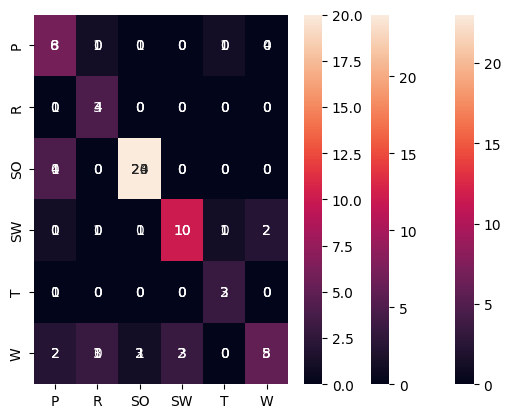

In [48]:
sns.heatmap(confusion_matrix(y_test,lr.predict(X_test)),xticklabels= enc.classes_,
            yticklabels=enc.classes_, annot=True,fmt='d')
plt.show()

# Confusion Matrix Random Forest

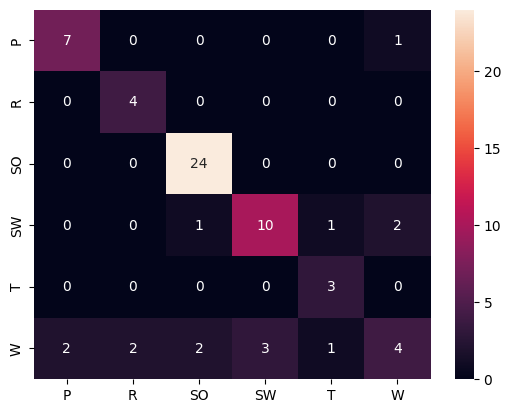

In [49]:
sns.heatmap(confusion_matrix(y_test,rf.predict(X_test)),xticklabels= enc.classes_,
            yticklabels=enc.classes_, annot=True,fmt='d')
plt.show()

# Confusion Matrix for Support Vector Classifier

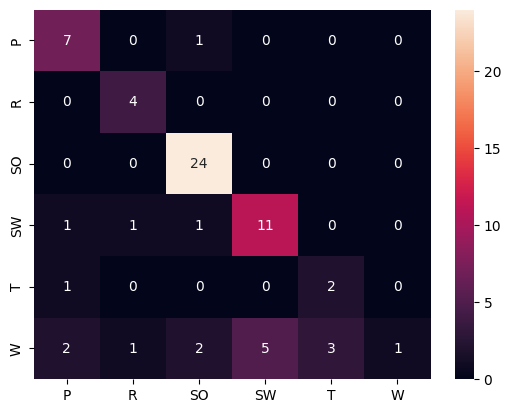

In [50]:
sns.heatmap(confusion_matrix(y_test,svc.predict(X_test)),xticklabels= enc.classes_,
            yticklabels=enc.classes_, annot=True,fmt='d')
plt.show()

# AUC

In [51]:
from sklearn import metrics


fpr, tpr, thresholds = metrics.roc_curve(y_test, ada.predict(np.array(X_test)), pos_label=2)
auc= metrics.auc(fpr, tpr)
auc

/home/msc1/anaconda3/envs/Object-Detection-API/lib/python3.8/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


0.27034883720930236

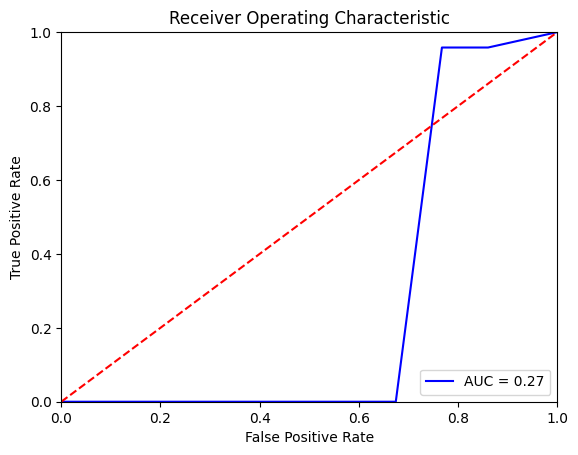

In [52]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()